# Exploratory Data Analysis 
- **Performed by - ISHA SINGH**
- **Dataset - Minute wise**


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
#Uploading the dataset
data = pd.read_csv('DataFrame.csv',index_col='Date',parse_dates=['Date'])

In [4]:
data.head()

,Type,Time,open,high,low,close,Unnamed: 7
Date,,,,,,,
2021-01-01,NIFTY,09:16,13997.90,14020.85,13991.35,14013.15,NaN
2021-01-01,NIFTY,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2021-01-01,NIFTY,09:18,14008.05,14013.10,14005.05,14012.70,NaN
2021-01-01,NIFTY,09:19,14013.65,14019.10,14013.65,14016.20,NaN
2021-01-01,NIFTY,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22805 entries, 2021-01-01 to 2021-03-31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        22805 non-null  object 
 1   Time        22805 non-null  object 
 2   open        22805 non-null  float64
 3   high        22805 non-null  float64
 4   low         22805 non-null  float64
 5   close       22805 non-null  float64
 6   Unnamed: 7  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


## Dropping unnecessary column
We see that the **'Unnamed: 7'** column contains no values and is unnecessay, Hence we drop it.

In [6]:
data.drop('Unnamed: 7',inplace=True,axis=1)

In [7]:
data['Type'].nunique()

1

We see that there is **only one unique value in the Type column i.e. NIFTY.** So we don't need that for our analysis. Hence, we drop it.

In [8]:
data.drop('Type',inplace=True,axis=1)

## Summary of the data

In [9]:
data.describe()

,open,high,low,close
count,22805.000000,22805.000000,22805.000000,22805.000000
mean,14703.322396,14707.486481,14699.102201,14703.260816
std,391.377498,391.265231,391.551643,391.366248
min,13604.750000,13614.400000,13596.750000,13602.800000
25%,14462.250000,14465.950000,14458.050000,14461.950000
50%,14739.500000,14743.000000,14735.850000,14739.450000
75%,15037.000000,15041.250000,15032.500000,15036.850000
max,15429.500000,15431.750000,15427.900000,15430.200000


## Checking for null values

In [10]:
data.isnull().sum()

Time     0
open     0
high     0
low      0
close    0
dtype: int64

## Checking for duplicate values

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(22805, 5)

## Checking the type of the data

In [13]:
type(data.Time[0])

str

In [14]:
# Converting Time column from str to datetime type
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
data['month'] = pd.to_datetime(data['Time']).dt.month
data['Time'] = pd.to_datetime(data['Time']).dt.time


In [15]:
data

,Time,open,high,low,close,Hour,month
Date,,,,,,,
2021-01-01,09:16:00,13997.90,14020.85,13991.35,14013.15,9,5
2021-01-01,09:17:00,14014.85,14018.55,14008.15,14009.05,9,5
2021-01-01,09:18:00,14008.05,14013.10,14005.05,14012.70,9,5
2021-01-01,09:19:00,14013.65,14019.10,14013.65,14016.20,9,5
2021-01-01,09:20:00,14015.45,14017.80,14011.95,14015.45,9,5
...,...,...,...,...,...,...,...
2021-03-31,15:27:00,14687.35,14694.35,14686.30,14690.60,15,5
2021-03-31,15:28:00,14690.90,14690.90,14686.05,14689.30,15,5
2021-03-31,15:29:00,14690.30,14694.10,14688.55,14691.30,15,5


**Again, checking the type of the 'Time' column**

In [16]:
type(data['Time'][0])

datetime.time

## Data Visualisation

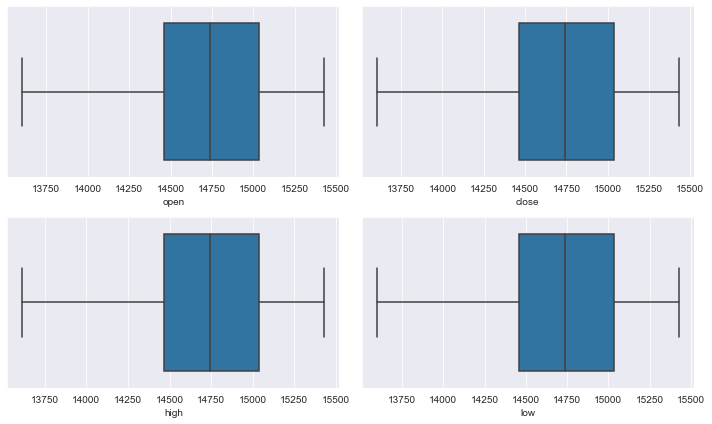

In [17]:
fig = plt.figure(figsize=(10,6))
plt.subplot(221)
sns.boxplot(x=data['open'])
plt.subplot(222)
sns.boxplot(x=data['close'])
plt.subplot(223)
sns.boxplot(x=data['high'])
plt.subplot(224)
sns.boxplot(x=data['low'])
plt.tight_layout()

As we can see from the above graph, **there are no outliers present.**

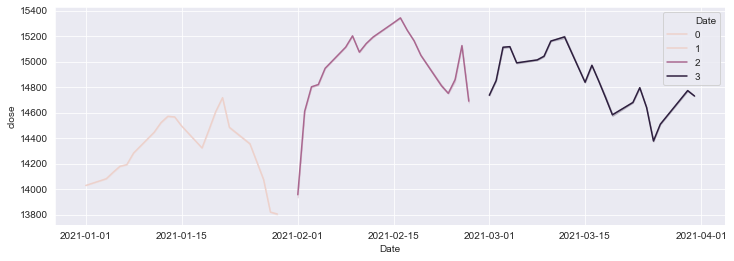

In [32]:
plt.figure(figsize=(12,4))
sns.lineplot(data.index,data['close'],hue=data.index.month)

## We can conclude the following from the above graph:
1. The closing prices fall at the end of each month and takes a leap at the start of the next month
2. The prices reaches peak twice in each month.

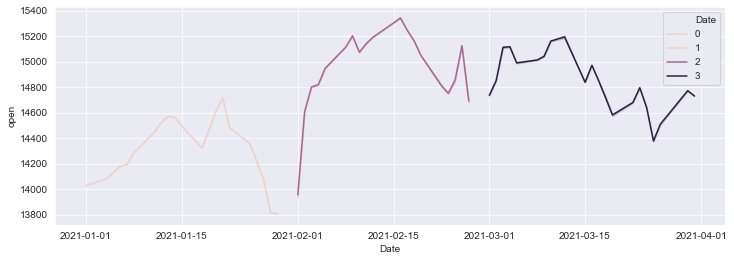

In [33]:
plt.figure(figsize=(12,4))
sns.lineplot(data.index,data['open'],hue=data.index.month)

**We see a similar trend in the opening prices.**

## Range of the data

In [34]:
range_open=data['open'].max()-data['open'].min()
print("The range of open is : {}".format(range_open))
range_high=data['high'].max()-data['high'].min()
print("The range of high is : {}".format(range_high))
range_low=data['low'].max()-data['low'].min()
print("The range of low is : {}".format(range_low))
range_close=data['close'].max()-data['close'].min()
print("The range of close is : {}".format(range_open))

The range of open is : 1824.75
The range of high is : 1817.3500000000004
The range of low is : 1831.1499999999996
The range of close is : 1824.75


## Correlation of the columns

In [35]:
data_corr = data.corr()

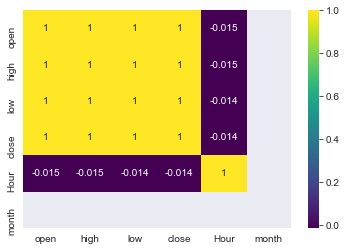

In [36]:
sns.heatmap(data_corr,annot=True,cmap='viridis')

## Insights from the graph:
1. Open, Close, High and low are strongly correlated.
2. Hour is negetively correlated with open, close, high and low

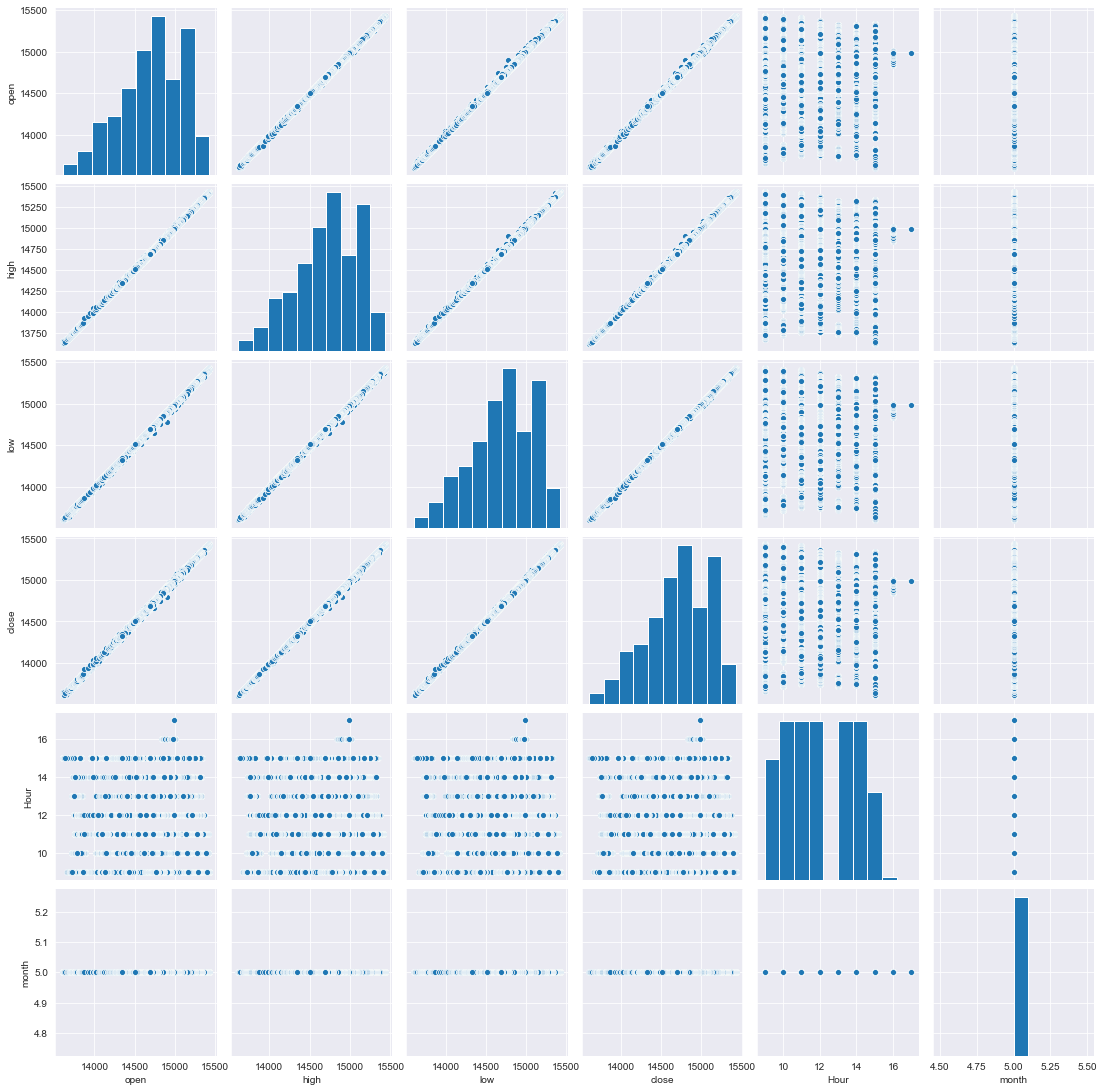

In [37]:
sns.pairplot(data)

We can see the relation of each column with each other.